In [1]:


# 1. What does R-squared represent in a regression model?
"""
R-squared, also known as the coefficient of determination, measures the proportion of 
the variance in the dependent variable that is predictable from the independent variables. 
It ranges from 0 to 1, where 0 indicates no explanatory power and 1 indicates perfect prediction.
"""

# 2. What are the assumptions of linear regression?
"""
1. Linearity: The relationship between the independent and dependent variables is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals have constant variance.
4. Normality: The residuals are normally distributed.
5. No Multicollinearity: Independent variables are not highly correlated.
"""

# 3. What is the difference between R-squared and Adjusted R-squared?
"""
- R-squared measures the proportion of variance explained by the model but may increase with irrelevant predictors.
- Adjusted R-squared adjusts for the number of predictors and increases only if the added predictor improves explanatory power.
"""

# 4. Why do we use Mean Squared Error (MSE)?
"""
MSE quantifies the average squared difference between the observed and predicted values. 
It penalizes larger errors more than smaller ones, making it useful for assessing model accuracy.
"""

# 5. What does an Adjusted R-squared value of 0.85 indicate?
"""
An Adjusted R-squared value of 0.85 means that 85% of the variance in the dependent variable 
is explained by the independent variables, accounting for the number of predictors in the model.
"""

# 6. How do we check for normality of residuals in linear regression?
"""
- Q-Q Plot: Residuals should follow a straight line.
- Shapiro-Wilk Test: Tests the null hypothesis that residuals are normally distributed.
- Histogram: Residuals should resemble a bell curve.
"""

# 7. What is multicollinearity, and how does it impact regression?
"""
Multicollinearity occurs when independent variables are highly correlated. It can lead to 
unstable coefficients and make it difficult to determine the individual effect of predictors.
"""

# 8. What is Mean Absolute Error (MAE)?
"""
MAE is the average of the absolute differences between the observed and predicted values. 
It is less sensitive to outliers than MSE.
"""

# 9. What are the benefits of using an ML pipeline?
"""
- Reproducibility: Standardizes preprocessing and modeling steps.
- Modularity: Easier to add or modify steps.
- Efficiency: Automates workflows, reducing manual errors.
"""

# 10. Why is RMSE considered more interpretable than MSE?
"""
RMSE is the square root of MSE and is in the same units as the dependent variable, 
making it easier to interpret in the context of the data.
"""

# 11. What is pickling in Python, and how is it useful in ML?
"""
Pickling serializes Python objects into a byte stream, allowing them to be saved and reloaded later. 
It is useful for saving ML models and workflows.
"""

# 12. What does a high R-squared value mean?
"""
A high R-squared value indicates that a large proportion of the variance in the dependent variable 
is explained by the model. However, it does not guarantee the model is good—other metrics should also be considered.
"""

# 13. What happens if linear regression assumptions are violated?
"""
Violations can lead to:
- Biased or inconsistent coefficients.
- Invalid statistical inferences (e.g., p-values, confidence intervals).
- Poor predictive performance.
"""

# 14. How can we address multicollinearity in regression?
"""
- Remove highly correlated predictors.
- Use dimensionality reduction techniques like PCA.
- Regularization methods (e.g., Ridge or Lasso regression).
"""

# 15. How can feature selection improve model performance in regression analysis?
"""
Feature selection reduces overfitting, improves model interpretability, and speeds up computation 
by focusing on the most relevant predictors.
"""

# 16. How is Adjusted R-squared calculated?
"""
Adjusted R-squared = 1 - [(1 - R^2) * (n - 1) / (n - p - 1)]
Where:
- R^2 is the coefficient of determination.
- n is the number of observations.
- p is the number of predictors.
"""

# 17. Why is MSE sensitive to outliers?
"""
MSE squares the errors, giving more weight to larger errors. This makes it sensitive to outliers, 
which can disproportionately influence the metric.
"""

# 18. What is the role of homoscedasticity in linear regression?
"""
Homoscedasticity ensures that the residuals have constant variance across all levels of the independent variables. 
This is crucial for valid hypothesis testing and confidence intervals.
"""

# 19. What is Root Mean Squared Error (RMSE)?
"""
RMSE is the square root of MSE and measures the average magnitude of errors in the same units as the dependent variable.
"""

# 20. Why is pickling considered risky?
"""
Pickling is insecure because it can execute arbitrary code during deserialization, making it vulnerable 
to malicious attacks if the source is untrusted.
"""

# 21. What alternatives exist to pickling for saving ML models?
"""
- Joblib: Optimized for storing large arrays.
- ONNX: Interoperable format for ML models.
- MLflow: A framework for tracking and saving models.
"""

# 22. What is heteroscedasticity, and why is it a problem?
"""
Heteroscedasticity occurs when residuals have non-constant variance. It can lead to biased standard errors, 
affecting hypothesis testing and model reliability.
"""

# 23. How can interaction terms enhance a regression model's predictive power?
"""
Interaction terms allow the model to capture combined effects of two or more predictors, 
improving the model's ability to explain variability in the dependent variable.
"""


"\nInteraction terms allow the model to capture combined effects of two or more predictors, \nimproving the model's ability to explain variability in the dependent variable.\n"

In [2]:
# Practical 

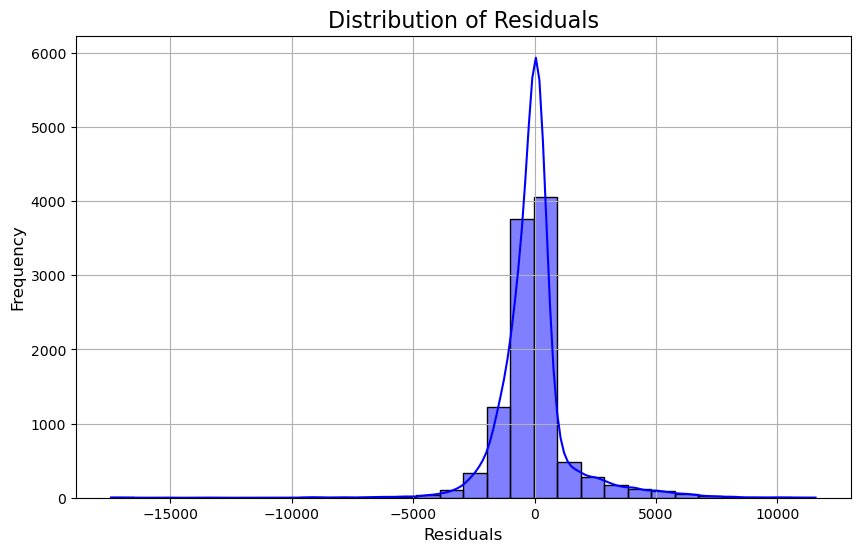

In [3]:
# 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']  # Numerical features for regression
target = 'price'

# Drop missing values (if any)
diamonds = diamonds.dropna()

# Split the dataset into train and test sets
X = diamonds[features]
y = diamonds[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


In [4]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']  # Numerical features
target = 'price'

# Drop missing values (if any)
diamonds = diamonds.dropna()

# Split the dataset into train and test sets
X = diamonds[features]
y = diamonds[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# output:
# Mean Squared Error (MSE): 2242178.90
# Mean Absolute Error (MAE): 888.48
# Root Mean Squared Error (RMSE): 1497.39

Mean Squared Error (MSE): 2242178.90
Mean Absolute Error (MAE): 888.48
Root Mean Squared Error (RMSE): 1497.39


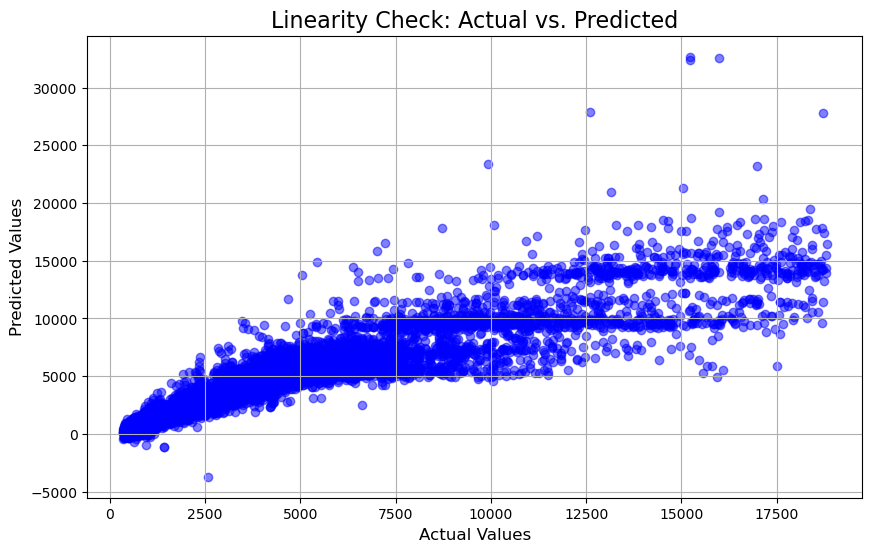

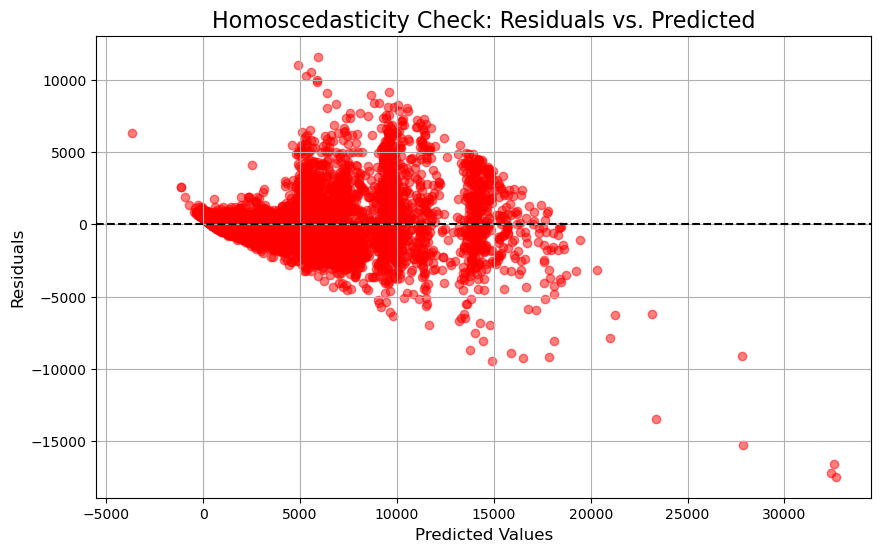

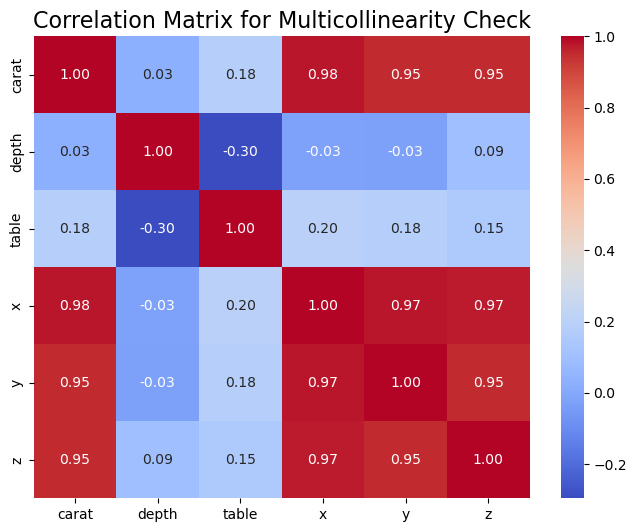

In [6]:
# 3.Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']  # Numerical features
target = 'price'

# Drop missing values (if any)
diamonds = diamonds.dropna()

# Split the dataset into train and test sets
X = diamonds[features]
y = diamonds[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# 1. Linearity Assumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Linearity Check: Actual vs. Predicted', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# 2. Homoscedasticity Check
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs. Predicted', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

# 3. Multicollinearity Check
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Multicollinearity Check', fontsize=16)
plt.show()



In [7]:
# 4.Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
features = ['carat', 'depth', 'table', 'x', 'y', 'z']  # Numerical features
target = 'price'

# Drop missing values (if any)
diamonds = diamonds.dropna()

# Split the dataset into train and test sets
X = diamonds[features]
y = diamonds[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model using a pipeline with feature scaling
results = []
for name, model in models.items():
    # Create a pipeline with StandardScaler and the regression model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R-squared": r2
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# output:
#                Model           MSE         MAE         RMSE  R-squared
# 0  Linear Regression  2.242179e+06  888.480863  1497.390699   0.858954
# 1   Ridge Regression  2.242190e+06  888.640577  1497.394498   0.858954
# 2   Lasso Regression  2.242224e+06  888.677599  1497.405710   0.858951
# 3      Decision Tree  1.927696e+06  781.487661  1388.415048   0.878737
# 4      Random Forest  1.901097e+06  787.658714  1378.802826   0.880410

               Model           MSE         MAE         RMSE  R-squared
0  Linear Regression  2.242179e+06  888.480863  1497.390699   0.858954
1   Ridge Regression  2.242190e+06  888.640577  1497.394498   0.858954
2   Lasso Regression  2.242224e+06  888.677599  1497.405710   0.858951
3      Decision Tree  1.927696e+06  781.487661  1388.415048   0.878737
4      Random Forest  1.901097e+06  787.658714  1378.802826   0.880410


In [8]:
# 5.Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select a single feature ('carat') and target ('price') for simple linear regression
X = diamonds[['carat']]
y = diamonds['price']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

# output:
# Coefficient: 7768.91
# Intercept: -2261.91
# R-squared Score: 0.85

Coefficient: 7768.91
Intercept: -2261.91
R-squared Score: 0.85


Coefficient: 0.11
Intercept: 0.93
R-squared Score: 0.54


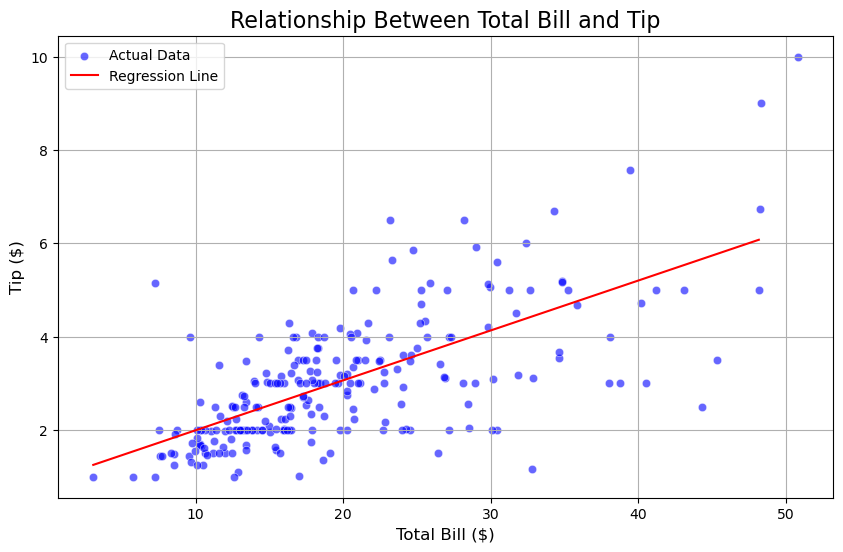

In [9]:
# 6.Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Select the feature (total_bill) and target (tip)
X = tips[['total_bill']]  # Feature
y = tips['tip']           # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', alpha=0.6, label='Actual Data')
sns.lineplot(x=X_test['total_bill'], y=y_pred, color='red', label='Regression Line')
plt.title('Relationship Between Total Bill and Tip', fontsize=16)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# output:
# Coefficient: 0.11
# Intercept: 0.93
# R-squared Score: 0.54

Coefficient (slope): 2.80
Intercept: 4.14
R-squared Score: 0.81


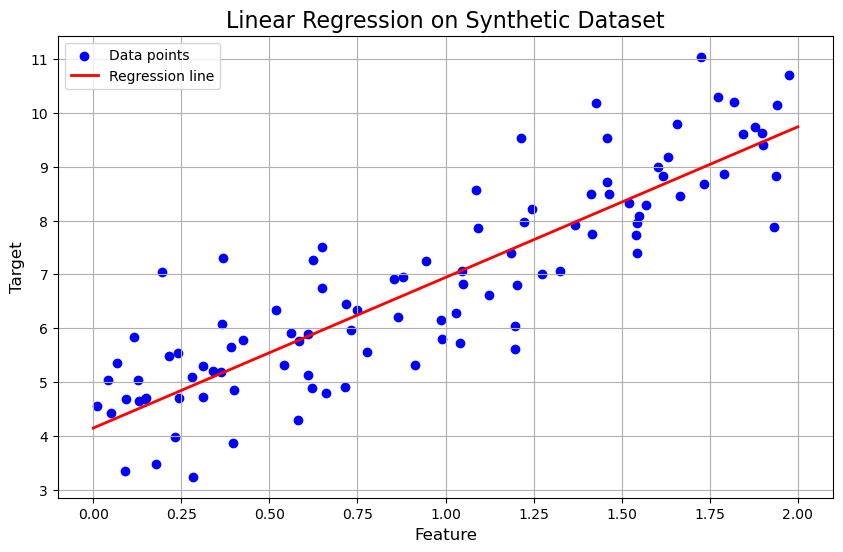

In [10]:
# 7.Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict new values
X_new = np.array([[0], [2]])  # New data points for prediction
y_new = model.predict(X_new)

# Print model details
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"R-squared Score: {model.score(X_test, y_test):.2f}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression on Synthetic Dataset', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# output:
# Coefficient (slope): 2.80
# Intercept: 4.14
# R-squared Score: 0.81

In [11]:
# 8.Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Pickle the trained model and save it to a file
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model has been pickled and saved to 'linear_regression_model.pkl'.")


Model has been pickled and saved to 'linear_regression_model.pkl'.


In [12]:
import pickle
import numpy as np

# Load the pickled model
with open('linear_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make a prediction using the loaded model
X_new = np.array([[1.5], [2.5]])  # New data points for prediction
y_new = loaded_model.predict(X_new)

print(f"Predictions: {y_new}")

# output:
# Predictions: [[ 8.34189881]
#  [11.14122246]]

Predictions: [[ 8.34189881]
 [11.14122246]]


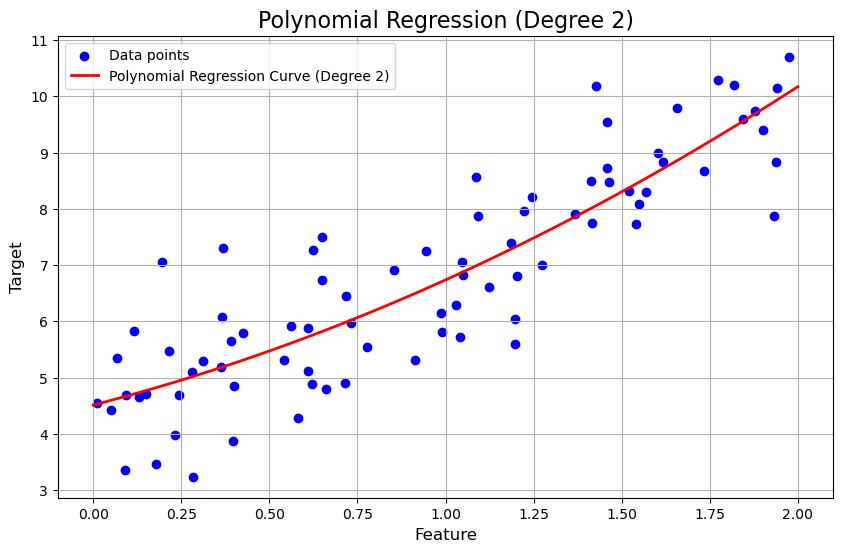

Model Coefficients: [[0.         1.61783129 0.60536011]]
Model Intercept: [4.51306679]


In [13]:
# 9.Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial feature transformer (degree=2)
poly = PolynomialFeatures(degree=2)

# Transform the feature to include polynomial terms
X_poly = poly.fit_transform(X_train)

# Train a linear regression model on the transformed features
model = LinearRegression()
model.fit(X_poly, y_train)

# Predict using the polynomial regression model
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)  # Points for plotting the regression curve
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 2)')
plt.title('Polynomial Regression (Degree 2)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print model details
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# output:
# Model Coefficients: [[0.         1.61783129 0.60536011]]
# Model Intercept: [4.51306679]

Coefficient (slope): 2.77
Intercept: 5.22


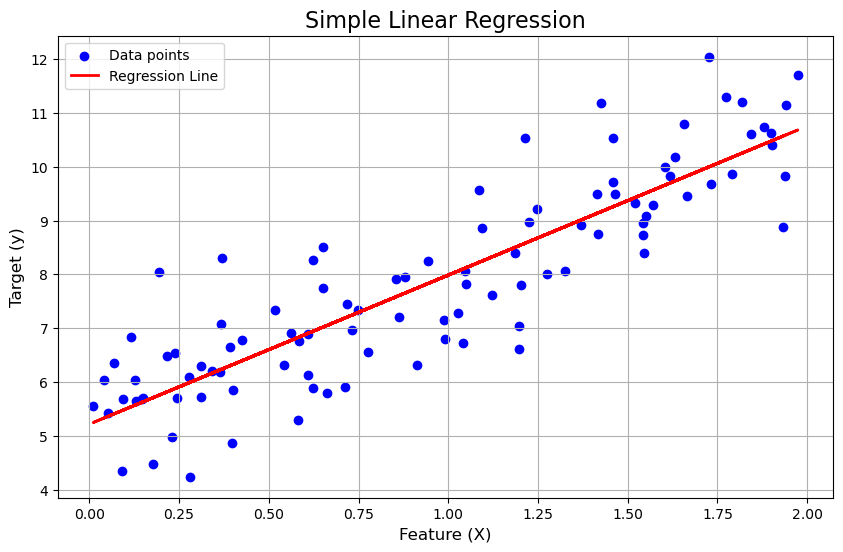

In [14]:
# 10.Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data for simple linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature: random values between 0 and 2
y = 5 + 3 * X + np.random.randn(100, 1)  # Target: linear relation with noise (y = 5 + 3*X + noise)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model's coefficient (slope) and intercept
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression', fontsize=16)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# output:
# Coefficient (slope): 2.77
# Intercept: 5.22

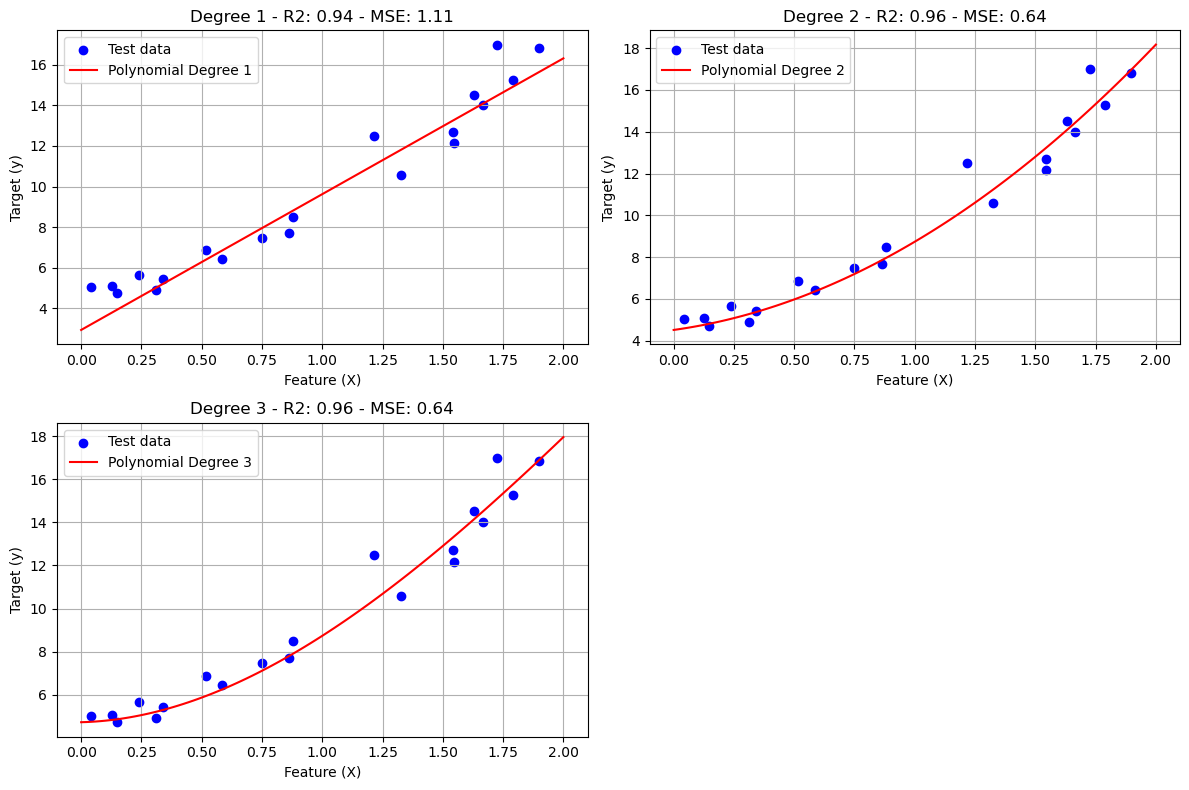

In [15]:
# 11.Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for polynomial regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature: random values between 0 and 2
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Target: quadratic relation with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit and evaluate polynomial regression models of different degrees
def evaluate_polynomial_models(X_train, X_test, y_train, y_test, degrees):
    plt.figure(figsize=(12, 8))
    for degree in degrees:
        # Transform features to polynomial features of the given degree
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        # Fit the linear regression model to the polynomial features
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Predict using the trained model
        y_pred = model.predict(X_poly_test)

        # Evaluate the model's performance
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Plot the polynomial regression curve
        X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
        X_plot_poly = poly.transform(X_plot)
        y_plot = model.predict(X_plot_poly)

        plt.subplot(2, 2, degree)
        plt.scatter(X_test, y_test, color='blue', label='Test data')
        plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Degree {degree}')
        plt.title(f'Degree {degree} - R2: {r2:.2f} - MSE: {mse:.2f}')
        plt.xlabel('Feature (X)')
        plt.ylabel('Target (y)')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# List of polynomial degrees to evaluate
degrees = [1, 2, 3]

# Evaluate the polynomial models
evaluate_polynomial_models(X_train, X_test, y_train, y_test, degrees)


Coefficients: [3.25451356 2.4741599 ]
Intercept: 4.716671499389689
R-squared Score: 0.55


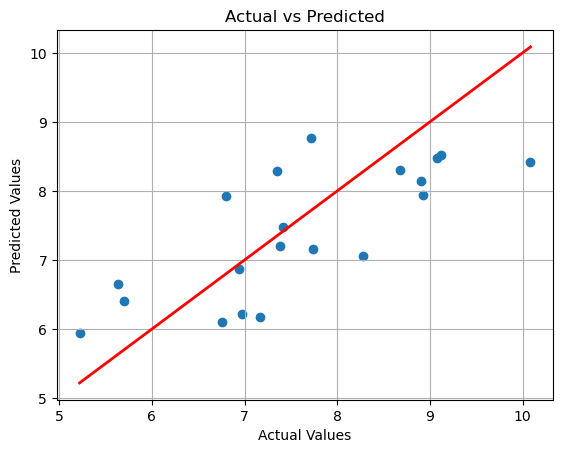

In [16]:
# 12.Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features
y = 5 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Target: linear relation with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {model.score(X_test, y_test):.2f}")

# Visualizing the result (for 2D data, plot the predictions against actual values)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# output:
# Coefficients: [3.25451356 2.4741599 ]
# Intercept: 4.716671499389689
# R-squared Score: 0.55

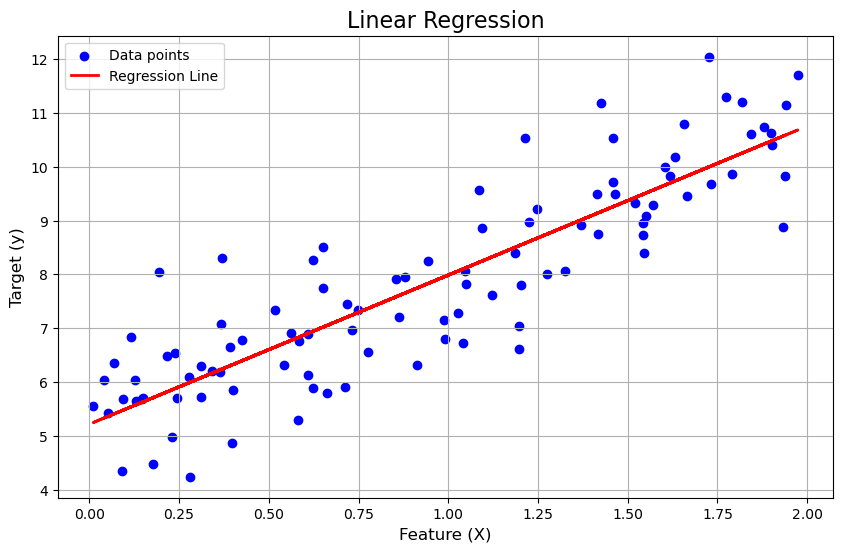

Coefficient (slope): 2.77
Intercept: 5.22


In [17]:
# 13.Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature: random values between 0 and 2
y = 5 + 3 * X + np.random.randn(100, 1)  # Target: linear relationship with noise

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Visualize the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')  # Plot the regression line
plt.title('Linear Regression', fontsize=16)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print model details
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


In [18]:
# 14.Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data with multiple features
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, effective_rank=4, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Step 2: Calculate VIF for each feature
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_df = calculate_vif(df)

# Step 3: Print the VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_df)

# Step 4: Interpret the results
threshold = 5
print("\nInterpretation:")
for _, row in vif_df.iterrows():
    if row['VIF'] > threshold:
        print(f"{row['Feature']} has a high VIF of {row['VIF']:.2f}, indicating multicollinearity.")
    else:
        print(f"{row['Feature']} has a low VIF of {row['VIF']:.2f}, indicating no significant multicollinearity.")
# output:
# Variance Inflation Factor (VIF) for each feature:
#      Feature       VIF
# 0  Feature_1  1.066884
# 1  Feature_2  1.134105
# 2  Feature_3  1.052053
# 3  Feature_4  1.009909
# 4  Feature_5  1.101850

# Interpretation:
# Feature_1 has a low VIF of 1.07, indicating no significant multicollinearity.
# Feature_2 has a low VIF of 1.13, indicating no significant multicollinearity.
# Feature_3 has a low VIF of 1.05, indicating no significant multicollinearity.
# Feature_4 has a low VIF of 1.01, indicating no significant multicollinearity.
# Feature_5 has a low VIF of 1.10, indicating no significant multicollinearity.


Variance Inflation Factor (VIF) for each feature:
     Feature       VIF
0  Feature_1  1.066884
1  Feature_2  1.134105
2  Feature_3  1.052053
3  Feature_4  1.009909
4  Feature_5  1.101850

Interpretation:
Feature_1 has a low VIF of 1.07, indicating no significant multicollinearity.
Feature_2 has a low VIF of 1.13, indicating no significant multicollinearity.
Feature_3 has a low VIF of 1.05, indicating no significant multicollinearity.
Feature_4 has a low VIF of 1.01, indicating no significant multicollinearity.
Feature_5 has a low VIF of 1.10, indicating no significant multicollinearity.


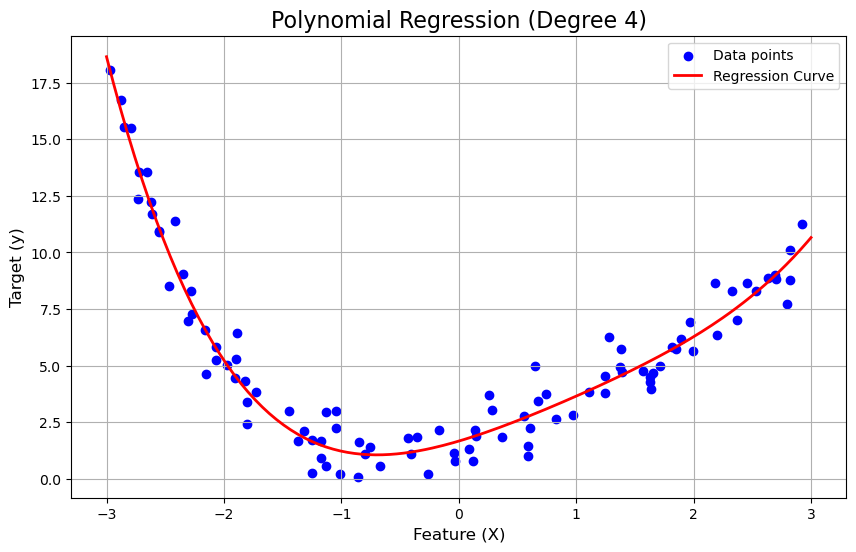

Coefficients of the polynomial regression model:
Intercept: 1.67
Coefficients: [ 1.53378043  0.68601582 -0.31833373  0.0840655 ]


In [19]:
# 15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Feature: random values between -3 and 3
y = 2 + 1.5 * X + 0.5 * X**2 - 0.3 * X**3 + 0.1 * X**4 + np.random.randn(100, 1)  # Degree 4 relationship with noise

# Step 2: Transform the features to polynomial features (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Step 3: Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Generate predictions for plotting
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)  # Smooth range for plotting
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Step 5: Plot the synthetic data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Regression Curve')
plt.title('Polynomial Regression (Degree 4)', fontsize=16)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print model details
print("Coefficients of the polynomial regression model:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficients: {model.coef_.flatten()[1:]}")


In [20]:
# 16.Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with multiple features
np.random.seed(42)
X = np.random.rand(200, 3)  # 3 features
y = 5 + 2 * X[:, 0] - 3 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(200)  # Linear relationship with noise

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 3.1: Standardize the features
    ('regressor', LinearRegression())  # Step 3.2: Fit a multiple linear regression model
])

# Step 4: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Make predictions and calculate the R-squared score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 6: Print the R-squared score
print(f"R-squared score: {r2:.2f}")

# output:
# R-squared score: 0.66

R-squared score: 0.66


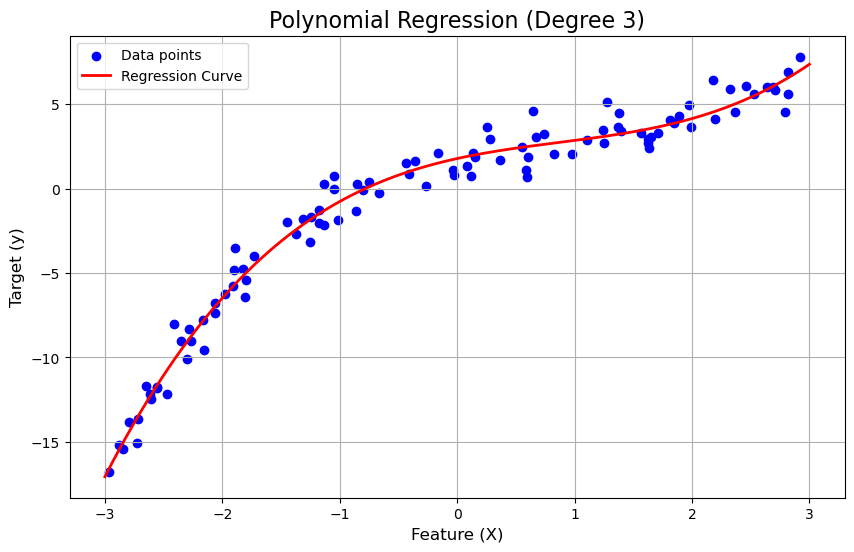

Coefficients of the polynomial regression model:
Intercept: 1.78
Coefficients: [ 1.52570217 -0.73695695  0.28297035]


In [21]:
# 17.Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for a cubic relationship (degree 3)
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Feature: random values between -3 and 3
y = 2 + 1.5 * X - 0.8 * X**2 + 0.3 * X**3 + np.random.randn(100, 1)  # Cubic relationship with noise

# Step 2: Transform the features to polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Step 3: Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Generate predictions for plotting
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)  # Smooth range for plotting
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Step 5: Plot the synthetic data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Regression Curve')  # Regression curve
plt.title('Polynomial Regression (Degree 3)', fontsize=16)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print model details
print("Coefficients of the polynomial regression model:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficients: {model.coef_.flatten()[1:]}")

# output:
# Coefficients of the polynomial regression model:
# Intercept: 1.78
# Coefficients: [ 1.52570217 -0.73695695  0.28297035]

In [22]:
# 18.Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 5 features
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 5)  # 5 features
true_coefficients = [2, -1.5, 3, 0.5, -2]  # True coefficients for generating y
noise = np.random.randn(n_samples) * 0.5  # Add some noise
y = 5 + np.dot(X, true_coefficients) + noise  # Linear relationship with bias

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print model coefficients, intercept, and R-squared score
print("Multiple Linear Regression Results:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared score: {r2:.2f}")

# output:
# Multiple Linear Regression Results:
# Intercept: 5.11
# Coefficients: [ 2.03547415 -1.64812173  2.95290233  0.5641224  -1.99104292]
# R-squared score: 0.86

Multiple Linear Regression Results:
Intercept: 5.11
Coefficients: [ 2.03547415 -1.64812173  2.95290233  0.5641224  -1.99104292]
R-squared score: 0.86


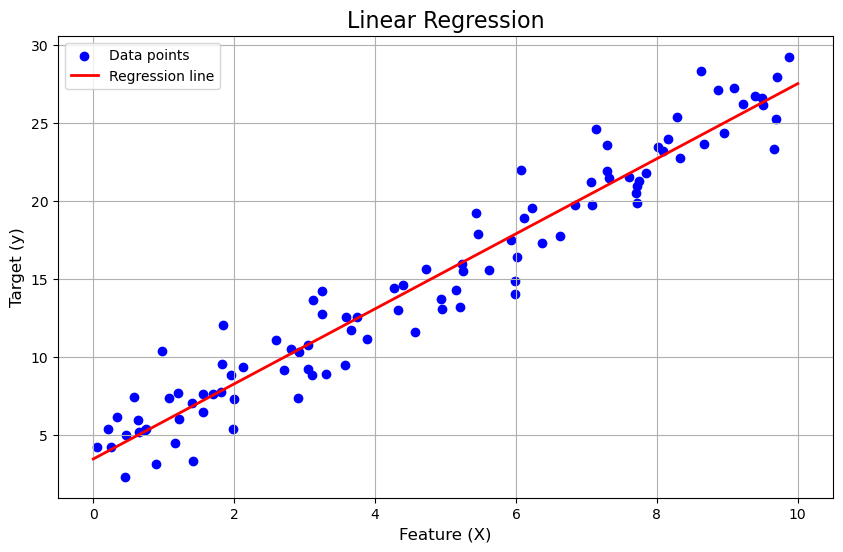

Linear Regression Model:
Intercept: 3.43
Coefficient: 2.41


In [23]:
# 19.Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # Feature: random values between 0 and 10
y = 3 + 2.5 * X + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Generate predictions
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)  # Smooth range for plotting
y_pred = model.predict(X_plot)

# Step 4: Visualize the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of data points
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Regression line')  # Regression line
plt.title('Linear Regression', fontsize=16)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print model coefficients
print("Linear Regression Model:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# output:
# Linear Regression Model:
# Intercept: 3.43
# Coefficient: 2.41

In [24]:
# 20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R- squared score and coefficients.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 3 features
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 3)  # 3 features
true_coefficients = [2.5, -1.7, 3.2]  # True coefficients for generating y
noise = np.random.randn(n_samples) * 0.5  # Add Gaussian noise
y = 4 + np.dot(X, true_coefficients) + noise  # Linear relationship with bias

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print model coefficients, intercept, and R-squared score
print("Multiple Linear Regression Results:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared score: {r2:.2f}")

# output:
# Multiple Linear Regression Results:
# Intercept: 4.12
# Coefficients: [ 2.48870032 -1.88462298  3.09312259]
# R-squared score: 0.92

Multiple Linear Regression Results:
Intercept: 4.12
Coefficients: [ 2.48870032 -1.88462298  3.09312259]
R-squared score: 0.92


In [26]:
# 21.Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import joblib

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Step 2: Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Serialize (save) the model using joblib
joblib.dump(model, 'linear_regression_model.joblib')
print("Model has been saved to 'linear_regression_model.joblib'.")

# Step 4: Deserialize (load) the model
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model has been loaded from 'linear_regression_model.joblib'.")

# Step 5: Use the loaded model to make predictions
y_pred = loaded_model.predict(X)

# Step 6: Evaluate the loaded model
r2 = r2_score(y, y_pred)
print(f"R-squared score of the loaded model: {r2:.2f}")

# output:
# Model has been saved to 'linear_regression_model.joblib'.
# Model has been loaded from 'linear_regression_model.joblib'.
# R-squared score of the loaded model: 1.00

Model has been saved to 'linear_regression_model.joblib'.
Model has been loaded from 'linear_regression_model.joblib'.
R-squared score of the loaded model: 1.00


In [27]:
# 22.Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Step 1: Load the Seaborn 'tips' dataset
import seaborn as sns
tips = sns.load_dataset('tips')

# Step 2: Prepare the dataset
# Select features and target variable
features = ['total_bill', 'sex', 'smoker', 'day', 'time']
target = 'tip'

# Separate the features and target variable
X = tips[features]
y = tips[target]

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Avoid dummy variable trap by dropping the first category

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 6: Print results
print("Linear Regression with One-Hot Encoding:")
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"R-squared score: {r2:.2f}")

# output:
# Linear Regression with One-Hot Encoding:
# Intercept: 0.74
# Coefficients:
# total_bill: 0.11
# sex_Female: -0.02
# smoker_No: 0.26
# day_Fri: 0.19
# day_Sat: 0.07
# day_Sun: 0.26
# time_Dinner: -0.19
# R-squared score: 0.48


Linear Regression with One-Hot Encoding:
Intercept: 0.74
Coefficients:
total_bill: 0.11
sex_Female: -0.02
smoker_No: 0.26
day_Fri: 0.19
day_Sat: 0.07
day_Sun: 0.26
time_Dinner: -0.19
R-squared score: 0.48


In [28]:
# 23.Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R- squared score.
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
n_features = 5

X = np.random.rand(n_samples, n_features)  # 5 features
true_coefficients = [1.5, -2.0, 3.0, -1.5, 2.5]  # True coefficients for generating y
noise = np.random.randn(n_samples) * 0.5  # Add some noise
y = 5 + np.dot(X, true_coefficients) + noise  # Linear relationship with bias

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 4: Train a Ridge Regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Calculate R-squared scores for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 7: Print coefficients and R-squared scores
print("Linear Regression Results:")
print(f"Intercept: {linear_model.intercept_:.2f}")
print(f"Coefficients: {linear_model.coef_}")
print(f"R-squared score: {r2_linear:.2f}")

print("\nRidge Regression Results:")
print(f"Intercept: {ridge_model.intercept_:.2f}")
print(f"Coefficients: {ridge_model.coef_}")
print(f"R-squared score: {r2_ridge:.2f}")


Linear Regression Results:
Intercept: 5.07
Coefficients: [ 1.32647934 -2.11696166  3.32395165 -1.4272077   2.27717992]
R-squared score: 0.86

Ridge Regression Results:
Intercept: 5.31
Coefficients: [ 1.07938362 -1.86961224  2.8802106  -1.21782182  1.97745571]
R-squared score: 0.83
